<a href="https://colab.research.google.com/github/sinarazi/Image-Processing/blob/main/Rotation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import math
import sys
import matplotlib.pyplot as plt

In [14]:
img = cv2.imread('/content/mandrill.jpg')
arr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convert simple image to 3 channel RGB format
arr.shape

(298, 298, 3)

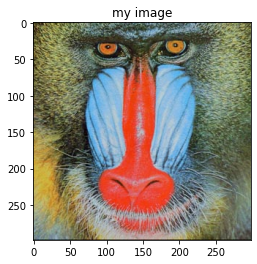

In [15]:
plt.imshow(arr)
plt.title('my image')
plt.show()

## Rotation Matrix Formula
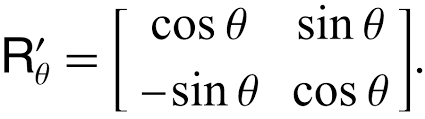

x′ = x cos u − y sin u

y′ = x sin u + y cos u

In [17]:
def rotation_matrix(cx, cy, angle):
    a = math.cos(angle * np.pi/180)
    b = math.sin(angle * np.pi/180)
    u = (1-a)*cx - b*cy
    v = b*cx + (1-a)*cy
    return np.array([[a,b,u], [-b,a,v]]) 

In [18]:
# shape of matrix
w = img.shape[0]
h = img.shape[1]

# center of image
cx, cy = (w/2, h/2)

In [19]:
def rotation(angle):
  w = img.shape[0]
  h = img.shape[1]

  # center of image
  cx, cy = (w/2, h/2)

  rotated = rotation_matrix(cx, cy, int(angle))
  cos = np.abs(rotated[0,0])
  sin = np.abs(rotated[0,1])

  newwidth = int(h * sin + w * cos)
  newheight = int(h * cos + w * sin)

  rotated[0,2] += (newwidth/2) - cx
  rotated[1,2] += (newheight/2) - cy

  return rotated, newwidth, newheight

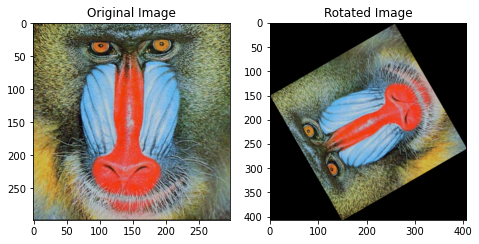

In [25]:
R_angle, final_Width, final_Height = rotation(120)
"""
You can choose every angle that you want.
Consider the fact that the rotation is clock-wise and turns rights
"""
final_img = cv2.warpAffine(img, R_angle, (final_Width,final_Height))
final_arr = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12,10))

plt.subplot(231), plt.imshow(arr), plt.title('Original Image')
plt.subplot(232), plt.imshow(final_arr), plt.title('Rotated Image')
plt.show()

In [29]:
import matplotlib.image as img
img.imsave('/content/mandril_rotated.jpg', final_arr)